In [37]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

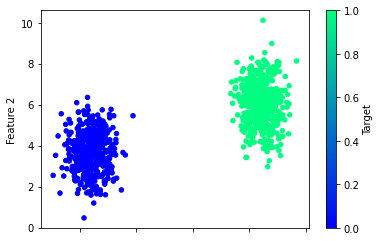

In [38]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [39]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [40]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [41]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

## * The input_dimparameter indicates how many inputs will be in the model (in this case two).
## * The units parameter indicates how many neurons we want in the hidden layer (in this case one).
## * The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to ## identify and train on nonlinear relationships in the dataset.

In [42]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [43]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [44]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 905us/step - loss: 0.7725 - accuracy: 0.2254
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7690 - accuracy: 0.1795
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7543 - accuracy: 0.1609
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7431 - accuracy: 0.2020
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7347 - accuracy: 0.2242
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7354 - accuracy: 0.2146
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7269 - accuracy: 0.2573
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.2641
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.3002
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.3068
Epoch 1

<AxesSubplot:>

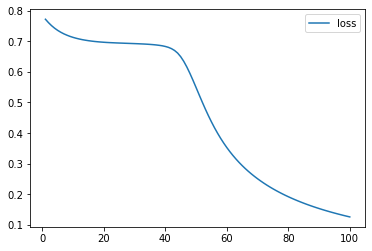

In [47]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

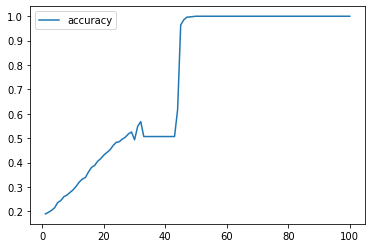

In [48]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [49]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1291 - accuracy: 1.0000
Loss: 0.1291283816099167, Accuracy: 1.0


In [50]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

# non linear data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

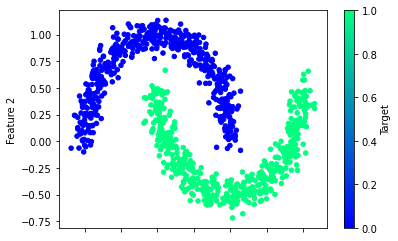

In [51]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [52]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [53]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7684 - accuracy: 0.5813
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.5987
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6133
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.6293
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.6493
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.6613
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.6720
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.6760
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.6893
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7013
Epoch 11/

<AxesSubplot:>

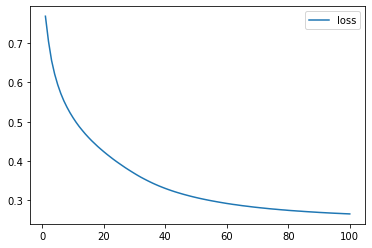

In [54]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [56]:
history_df

,loss,accuracy
1,0.768392,0.581333
2,0.704487,0.598667
3,0.655882,0.613333
4,0.621347,0.629333
5,0.594245,0.649333
...,...,...
96,0.266783,0.889333
97,0.266442,0.888000
98,0.266042,0.889333
99,0.265713,0.889333


<AxesSubplot:>

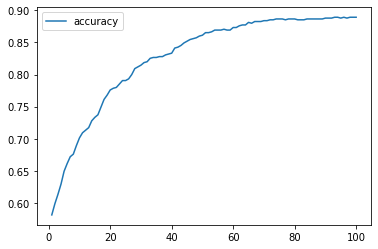

In [55]:
# Plot the accuracy
history_df.plot(y="accuracy")

# adding more neurons to the hidden layer 2-3X the amount of inputs

In [57]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [58]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [59]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 787us/step - loss: 0.6938 - accuracy: 0.6115
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6990
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.7407
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7472
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7522
Epoch 6/100
24/24 [==============================] - 0s 979us/step - loss: 0.5451 - accuracy: 0.8008
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8062
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.8304
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8507
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8553
Epoch